<a href="https://colab.research.google.com/github/Andrea68A/Puc_Ciencia_Dados/blob/main/MVP_Dataset_Suporte_Tecnico_Andrea_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre o dataset de chamados abertos para o  Suporte Técnico

O dataset **Technical Support Dataset** (https://www.kaggle.com/datasets/suvroo/technical-support-dataset/data?select=Technical+Support+Dataset.csv) possibilita a análise e criação de indicadores sobre a resolução de Chamados de Suporte Técnico.
Este dataset permite a classificação de um chamado segundo:

  *   A sua origem (por e-mail, chat ou telefone),
  *   O tópico / assunto abordado (ex: bug, configuração de produtos, etc.),
  *   A prioridade no atendimento (alta, média, baixa),
  *   Seu nível de suporte (Tier1 ou Tier2),
  *   Os tempos acordados e reais para primeiro atendimento e para resolução.

O dataset analisado se refere aos chamados (tíquetes) de suporte técnico no ano de 2023 em alguns países da Europa. Mais informações sobre o modelo podem ser obtidas em https://www.kaggle.com/datasets/suvroo/technical-support-dataset/data



## Importando o dataset Technical Support Dataset #

Importando o dataset **Technical Support Dataset** a partir de uma URL. Para facilitar o acesso, o dataset foi copiado para o Github, em modo **raw**.



In [ ]:
# importação do Pandas
import pandas as pd

# importando dados de uma url para um dataframe

# url a importar

url_dados = 'https://raw.githubusercontent.com/Andrea68A/Puc_Ciencia_Dados/refs/heads/mvp_trabalho/Technical%20Support%20Dataset.csv'


# carga do dataset através da url, com separador de colunas = "," e pulando linhas com erros
chamados_tec = pd.read_csv(url_dados, sep =",", on_bad_lines='skip') # pulando linhas com erros


## Estatísticas descritivas e uma rápida análise exploratória do dataset

Alguns comandos da biblioteca Pandas para exibir algumas estatísticas descritivas e fazer uma rápida análise exploratória do dataset.

In [ ]:
# verificando que chamados_tech é um dataframe
print(type(chamados_tec))
print()

# Exibiição de dados estáticos sobre o dataset
chamados_tec.describe()


<class 'pandas.core.frame.DataFrame'>



Ticket ID  Agent interactions  Survey results     Latitude  \
count  2330.000000         2312.000000     1173.000000  2330.000000   
mean   2481.857082            5.470156        3.510656    48.260756   
std     858.040637            8.130958        1.240361     5.085409   
min    1012.000000            1.000000        1.000000    39.368279   
25%    1726.250000            2.000000        3.000000    43.036776   
50%    2480.000000            4.000000        4.000000    48.864716   
75%    3233.750000            6.000000        4.000000    52.536273   
max    3999.000000           60.000000        5.000000    55.378052   

         Longitude  
count  2330.000000  
mean      9.849723  
std       9.814618  
min      -8.019675  
25%       2.349014  
50%      12.678565  
75%      15.474913  
max      25.483304

In [ ]:
# verificando os tipos de cada coluna do dataframe
print(chamados_tec.dtypes)

Status                             object
Ticket ID                           int64
Priority                           object
Source                             object
Topic                              object
Agent Group                        object
Agent Name                         object
Created time                       object
Expected SLA to resolve            object
Expected SLA to first response     object
First response time                object
SLA For first response             object
Resolution time                    object
SLA For Resolution                 object
Close time                         object
Agent interactions                float64
Survey results                    float64
Product group                      object
Support Level                      object
Country                            object
Latitude                          float64
Longitude                         float64
dtype: object


## Limpeza dos atributos irrelevantes ao modelo

In [ ]:
# Eliminando a coluna 'Agent Name', por ser irrelevante à análise
chamados_tec.drop(['Agent Name']
                  ,axis=1,inplace=True)

# Exibindo o nome das colunas após eliminar a coluna 'Agent Name'
chamados_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Status                          2330 non-null   object 
 1   Ticket ID                       2330 non-null   int64  
 2   Priority                        2330 non-null   object 
 3   Source                          2330 non-null   object 
 4   Topic                           2330 non-null   object 
 5   Agent Group                     2330 non-null   object 
 6   Created time                    2330 non-null   object 
 7   Expected SLA to resolve         2330 non-null   object 
 8   Expected SLA to first response  2330 non-null   object 
 9   First response time             2312 non-null   object 
 10  SLA For first response          2330 non-null   object 
 11  Resolution time                 1912 non-null   object 
 12  SLA For Resolution              23

In [ ]:
# exibindo as 5 primeiras linhas
chamados_tec.head()



Status  Ticket ID Priority Source                     Topic  \
0       Closed       1012      Low  Email           Feature request   
1  In progress       1013     High  Phone             Product setup   
2     Resolved       1014      Low   Chat  Purchasing and invoicing   
3       Closed       1015   Medium  Email     Pricing and licensing   
4       Closed       1016      Low  Email             Product setup   

        Agent Group         Created time Expected SLA to resolve  \
0  1st line support  2023-01-02 00:58:36     2023-01-04 00:58:36   
1  2nd line support  2023-01-02 07:27:25     2023-01-04 07:27:25   
2  1st line support  2023-01-02 06:59:04     2023-01-03 06:59:04   
3  1st line support  2023-01-03 03:09:39     2023-01-05 03:09:39   
4  1st line support  2023-01-03 00:03:58     2023-01-05 00:03:58   

  Expected SLA to first response      First response time  ...  \
0            2023-01-02 01:58:36  2023-01-02 01:03:17.432  ...   
1            2023-01-02 07:29:25  2023-01-02 07:27:43.231  ...   
2            2023-01-02 07:01:04  2023-01-02 06:59:57.471  ...   
3            2023-01-03 04:09:39  2023-01-03 07:09:15.835  ...   
4            2023-01-03 01:03:58  2023-01-03 00:08:01.684  ...   

           Resolution time SLA For Resolution               Close time  \
0  2023-01-04 00:31:51.694         Within SLA  2023-01-04 04:02:59.013   
1                      NaN       SLA Violated                      NaN   
2  2023-01-02 22:45:32.974         Within SLA                      NaN   
3  2023-01-04 14:32:34.979         Within SLA  2023-01-08 04:24:54.771   
4  2023-01-04 12:03:05.986         Within SLA  2023-01-06 06:05:08.637   

  Agent interactions  Survey results                Product group  \
0                1.0             3.0  Custom software development   
1                3.0             NaN                        Other   
2                2.0             NaN  Custom software development   
3               10.0             4.0        Ready to use Software   
4                1.0             2.0                        Other   

  Support Level              Country   Latitude  Longitude  
0        Tier 1  Republic of Ireland  53.094024  -8.019675  
1        Tier 2                Italy  43.036776  12.678565  
2        Tier 1              Austria  47.696472  13.345735  
3        Tier 1                Spain  39.673370  -4.767726  
4        Tier 1              Austria  47.696472  13.345735  

[5 rows x 21 columns]

In [ ]:
# exibindo as 5 últimas linhas
chamados_tec.tail()

Status  Ticket ID Priority Source                  Topic  \
2325  Resolved       3988      Low  Email          Product setup   
2326  Resolved       3996   Medium  Email  Pricing and licensing   
2327  Resolved       3997     High  Email        Feature request   
2328  Resolved       3998      Low  Email          Product setup   
2329  Resolved       3999     High  Email        Feature request   

           Agent Group         Created time Expected SLA to resolve  \
2325  1st line support  2023-12-29 03:33:04     2023-12-31 03:33:04   
2326  1st line support  2023-12-30 03:11:44     2024-01-01 03:11:44   
2327  2nd line support  2023-12-30 04:51:54     2024-01-01 04:51:54   
2328  1st line support  2023-12-30 13:16:56     2024-01-01 13:16:56   
2329  1st line support  2023-12-30 19:49:51     2024-01-01 19:49:51   

     Expected SLA to first response      First response time  ...  \
2325            2023-12-29 04:33:04  2023-12-29 04:29:37.420  ...   
2326            2023-12-30 04:11:44  2023-12-30 04:09:58.671  ...   
2327            2023-12-30 05:51:54  2023-12-30 04:54:26.957  ...   
2328            2023-12-30 14:16:56  2023-12-30 13:53:21.103  ...   
2329            2023-12-30 20:49:51  2023-12-30 20:18:08.199  ...   

              Resolution time SLA For Resolution Close time  \
2325  2023-12-30 18:38:54.682         Within SLA        NaN   
2326  2023-12-30 20:49:05.132         Within SLA        NaN   
2327  2024-01-04 05:39:41.133       SLA Violated        NaN   
2328  2023-12-31 23:25:16.816         Within SLA        NaN   
2329  2024-01-01 10:17:15.196         Within SLA        NaN   

     Agent interactions  Survey results                Product group  \
2325                1.0             NaN        Ready to use Software   
2326                1.0             NaN  Custom software development   
2327                1.0             NaN                        Other   
2328               10.0             NaN  Custom software development   
2329                2.0             NaN  Custom software development   

     Support Level              Country   Latitude  Longitude  
2325        Tier 1                Spain  39.673370  -4.767726  
2326        Tier 1             Slovenia  46.149166  14.986011  
2327        Tier 2  Republic of Ireland  53.094024  -8.019675  
2328        Tier 1  Republic of Ireland  53.094024  -8.019675  
2329        Tier 1              Germany  51.165691  10.451526  

[5 rows x 21 columns]

In [ ]:
# exibindo as dimensões do dataset (linhas, colunas)
chamados_tec.shape

(2330, 21)

In [ ]:
# informações sobre o dataset

chamados_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Status                          2330 non-null   object 
 1   Ticket ID                       2330 non-null   int64  
 2   Priority                        2330 non-null   object 
 3   Source                          2330 non-null   object 
 4   Topic                           2330 non-null   object 
 5   Agent Group                     2330 non-null   object 
 6   Created time                    2330 non-null   object 
 7   Expected SLA to resolve         2330 non-null   object 
 8   Expected SLA to first response  2330 non-null   object 
 9   First response time             2312 non-null   object 
 10  SLA For first response          2330 non-null   object 
 11  Resolution time                 1912 non-null   object 
 12  SLA For Resolution              23

## Gráficos

###Gráfico de barras - análise por uma variável

.
/content


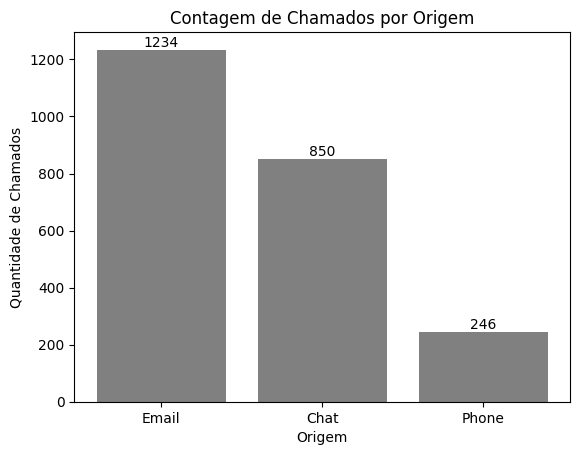

In [28]:
# importação do pyplot
import matplotlib.pyplot as plt

# Gráfico de barras - contagem de chamados por origem (e-mail, telefone, chat)

container_barra = plt.bar(chamados_tec['Source'].value_counts().index, chamados_tec['Source'].value_counts().values,color='grey')
plt.grid(False)
plt.xlabel('Origem')
plt.bar_label(container_barra)
plt.ylabel('Quantidade de Chamados')
plt.title('Contagem de Chamados por Origem')

# Cria pasta figs para salvar  imagens
import os
import sys
path = "Figs"

print(os.curdir)
print(os.getcwd())
os.makedirs(path, exist_ok=True)
# Verifica se a pasta existe, senão cria
#if not os.path.exists(path):
#  os.makedirs(path)

# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
plt.savefig("barras-alfa.pdf")
plt.savefig("barras-alfa.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("barras-alfa.png", dpi = 150)

plt.show()

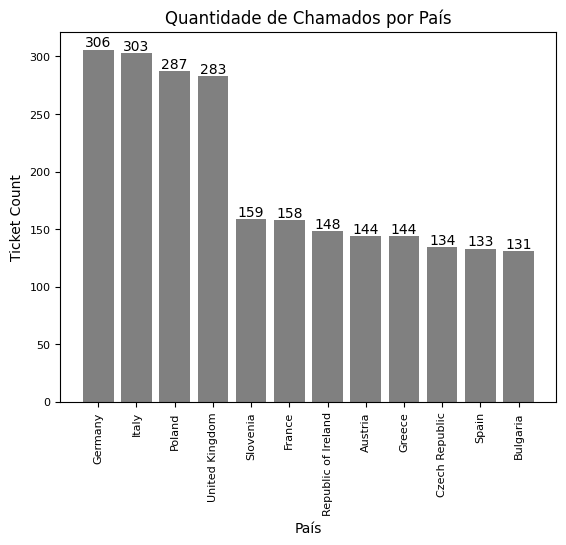

In [ ]:
# importação do pyplot
import matplotlib.pyplot as plt

# Gráfico de barras - contagem de chamados por país
bar_container = plt.bar(chamados_tec['Country'].value_counts().index, chamados_tec['Country'].value_counts().values,color='grey')
plt.xlabel('País')
plt.xticks(fontsize=8, rotation=90)
plt.bar_label(bar_container)
plt.ylabel('Ticket Count')
plt.yticks(fontsize=8)
plt.title('Quantidade de Chamados por País')
plt.show()

###Análise multivariada - gráfico de barras

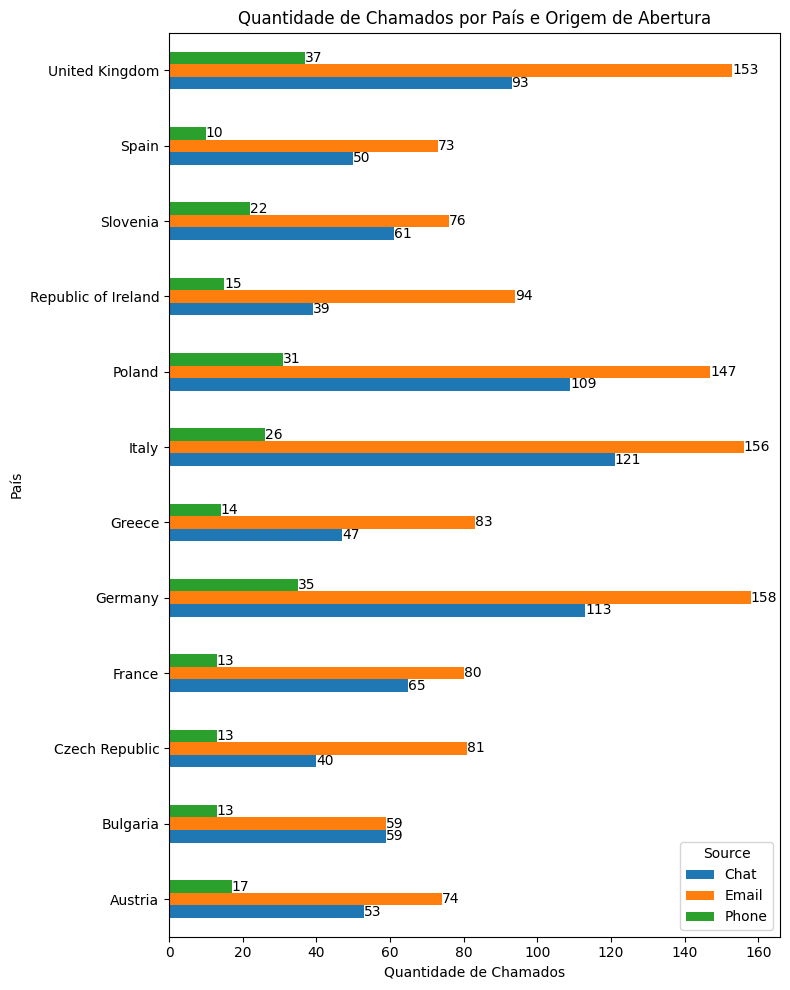

In [25]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# gráfico de barras horizontais - análise multivariada - chamados por país e origem (e-mail, telefone ou chat)
dados = chamados_tec.groupby(by=['Country','Source']).size().unstack()
ax = dados.plot.barh(figsize=(8, 10))

for container in ax.containers: # imprime as quantidades de chamado por origem, próximo às barras
    ax.bar_label(container)

ax.set_xlabel('Quantidade de Chamados')
ax.set_ylabel('País')
ax.set_title('Quantidade de Chamados por País e Origem de Abertura')
plt.tight_layout()
plt.show()


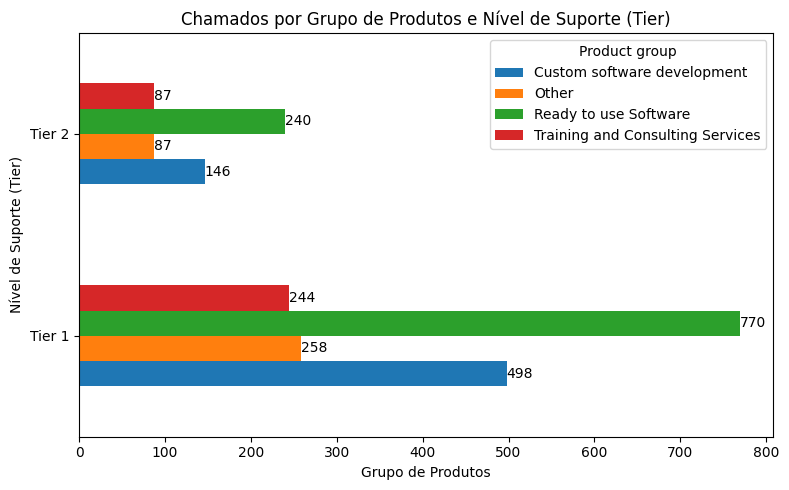

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# gráfico de barras horizontais - análise por nível de suporte e grupo de produto
dados = chamados_tec.groupby(by=['Support Level','Product group']).size().unstack()
ax = dados.plot.barh(figsize=(8,5))

for container in ax.containers: # imprime as quantidades de chamado por origem, próximo às barras
    ax.bar_label(container)

ax.set_xlabel('Grupo de Produtos')
ax.set_ylabel('Nível de Suporte (Tier)')
ax.grid(False)
ax.set_title('Chamados por Grupo de Produtos e Nível de Suporte (Tier)')
plt.tight_layout()
plt.show()


### Chamados abertos por semana e mês - gráfico de linhas

In [ ]:
# declaração de variáveis
# cont_semanal - quantidade de chamados criados por semana
# cont_mensal - quantidade de chamados criados (abertos) por mês

chamados_tec['Created time'] = pd.to_datetime(chamados_tec['Created time'])

cont_semanal = chamados_tec.groupby(chamados_tec['Created time'].dt.to_period('W')).size()

cont_mensal = chamados_tec.groupby(chamados_tec['Created time'].dt.to_period('M')).size()


Text(0, 0.5, 'Quantidade de Chamados')

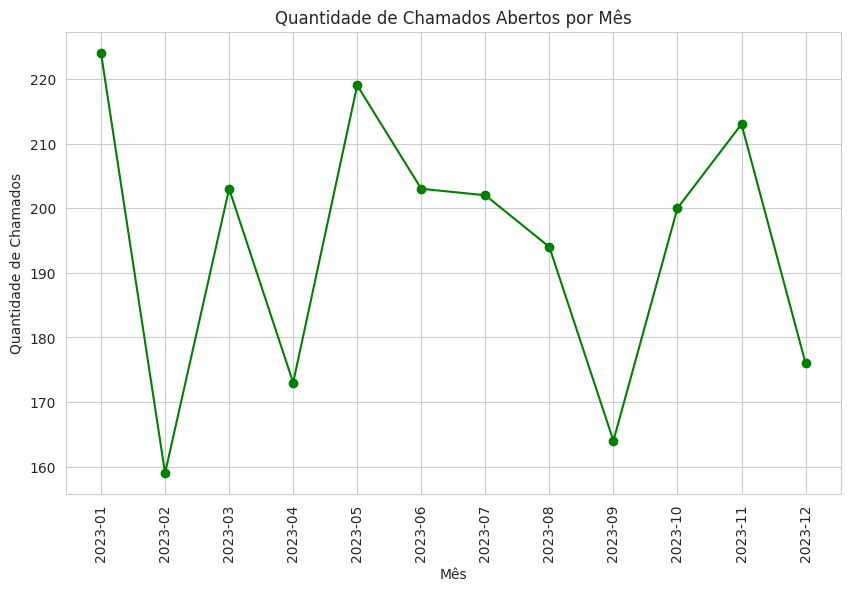

In [ ]:
# Gráfico de linhas - quantidade de chamados abertos por mês
import matplotlib.pyplot as plt
import seaborn as sns
dados = cont_mensal.values
meses = cont_mensal.index.astype(str)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(meses, dados, marker='o', linestyle='-', color='g')
plt.xticks(rotation=90)
plt.title('Quantidade de Chamados Abertos por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Chamados')


Text(0, 0.5, 'Quantidade de Chamados')

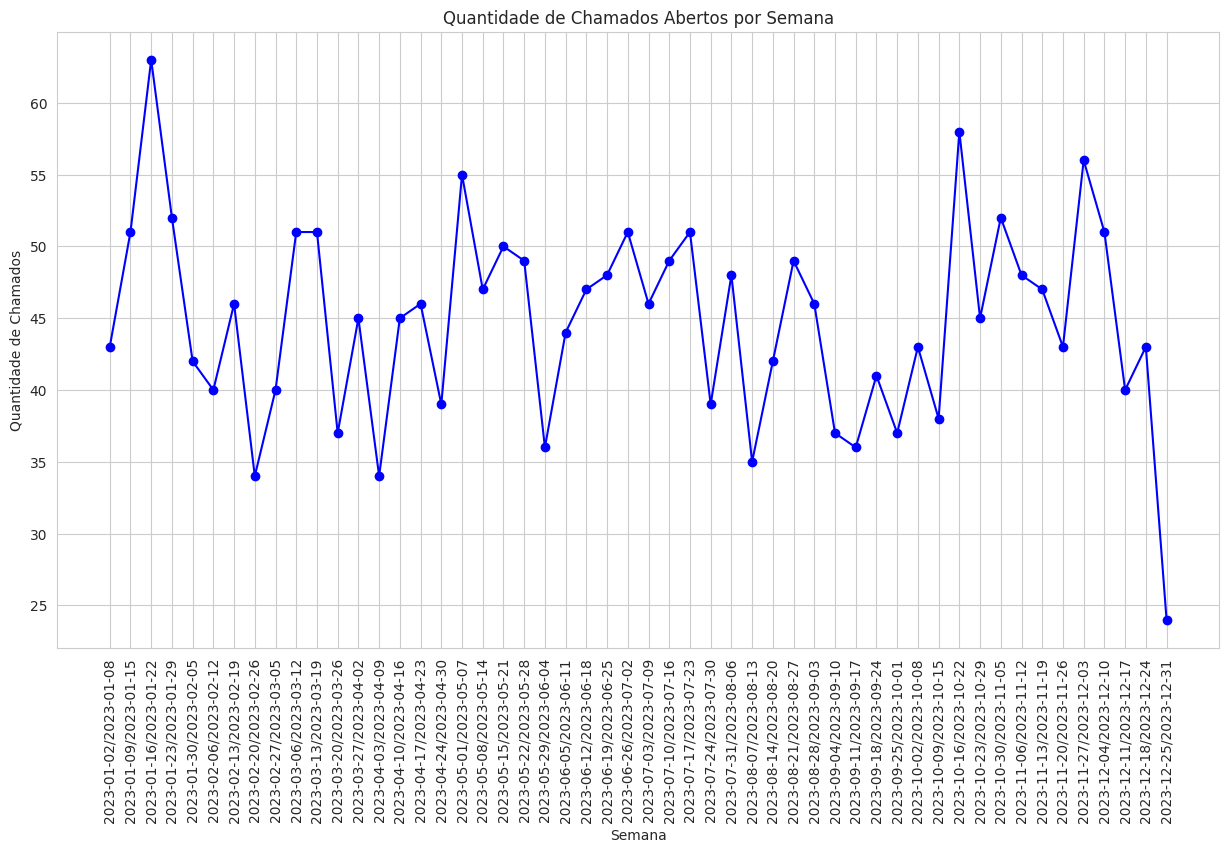

In [ ]:
# Gráfico de linhas - quantidade de chamados abertos por semana
import matplotlib.pyplot as plt
import seaborn as sns

dados = cont_semanal.values
semanas = cont_semanal.index.astype(str)
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))
plt.plot(semanas, dados, marker='o', linestyle='-', color='b')
plt.xticks(rotation=90)
plt.title('Quantidade de Chamados Abertos por Semana')
plt.xlabel('Semana')
plt.ylabel('Quantidade de Chamados')

###Análise multivariada - gráfico de tendências mensais por tópico (assunto)

Text(0, 0.5, 'Quantidade de Chamados')

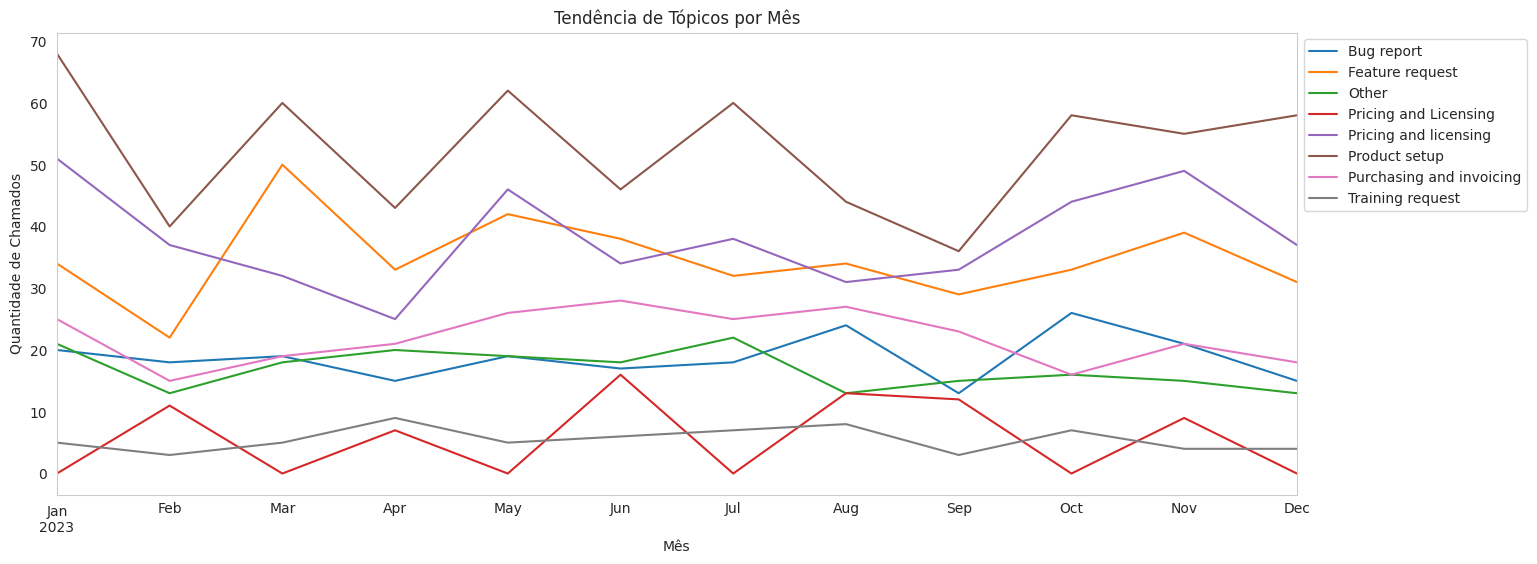

In [ ]:
# importações necessárias
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns

# Gráfico de múltiplas linhas - tendência de tópicos por mês
topic_trends = chamados_tec.groupby([chamados_tec['Created time'].dt.to_period('M'), 'Topic']).size().unstack(fill_value=0)
topic_trends.plot(kind='line', figsize=(16, 6))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))



plt.grid(False)
plt.title('Tendência de Tópicos por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Chamados')


###Gráfico de barras empilhadas

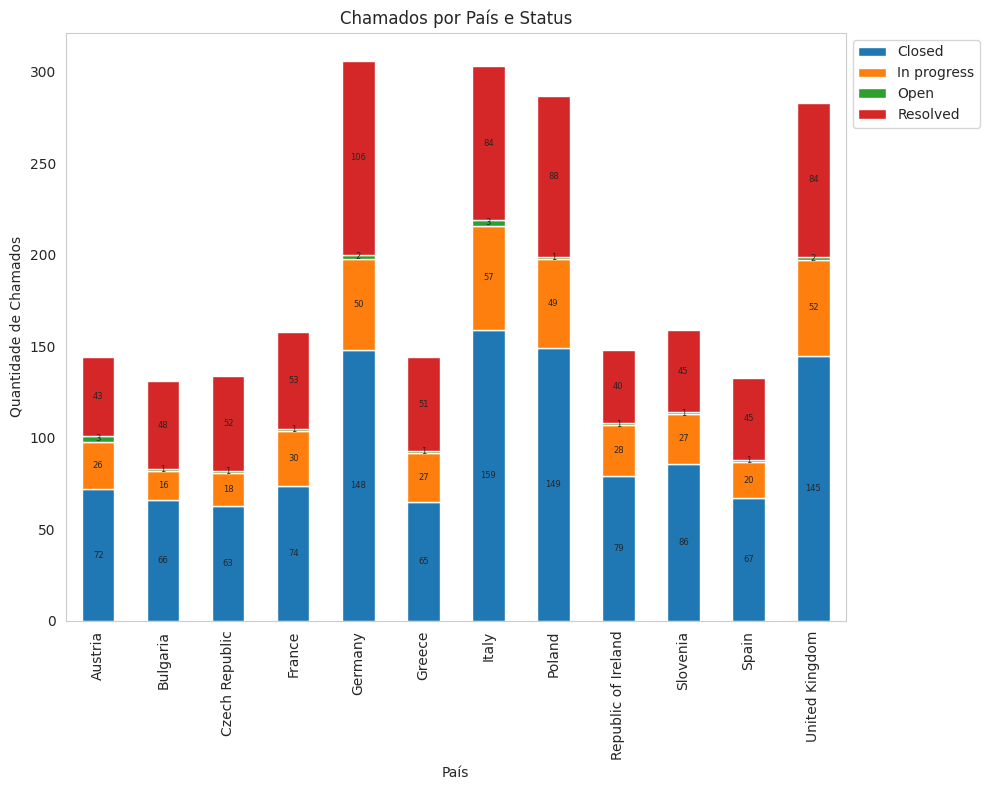

In [ ]:
# Chamados agrupados por País e Status - gráfico de barras empilhadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


dados = chamados_tec.groupby(by=['Country','Status']).size().unstack()



# Resetando o índice para tornar 'Country' uma coluna novamente
dados = dados.reset_index()

ax = dados.plot(x='Country',kind='bar', stacked=True,
        title='Chamados por País e Status',figsize=(10, 8))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(False)

ax.set_xlabel('País')
ax.set_ylabel('Quantidade de Chamados')
for container in ax.containers: # imprime as quantidades de chamado por status, próximo às barras
    ax.bar_label(container, fontsize=6, label_type='center')

plt.tight_layout()
plt.show()





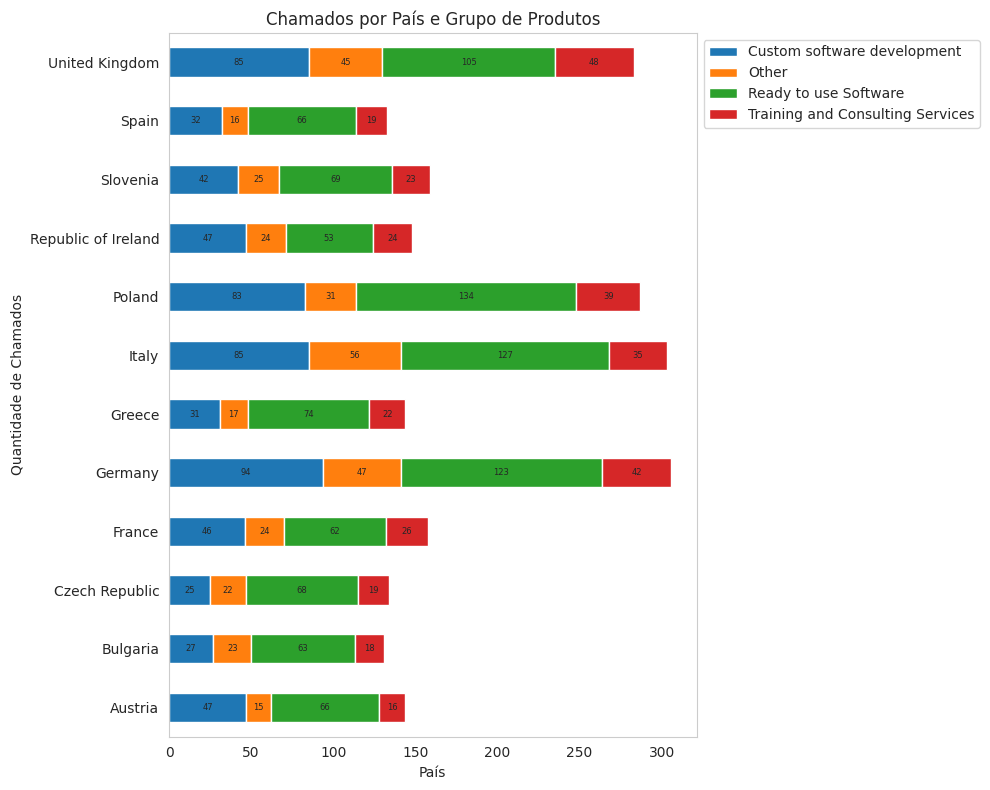

In [ ]:


# Chamados agrupados por País e Grupo de Produtos - gráfico de barras empilhadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


dados = chamados_tec.groupby(by=['Country','Product group']).size().unstack()



# Reset the index to make 'Country' a column again
dados = dados.reset_index()

ax = dados.plot(x='Country',kind='barh', stacked=True,
        title='Chamados por País e Grupo de Produtos',figsize=(10, 8))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(False)

ax.set_xlabel('País')
ax.set_ylabel('Quantidade de Chamados')
for container in ax.containers: # imprime as quantidades de chamado por status, próximo às barras
    ax.bar_label(container, fontsize=6, label_type='center')

plt.tight_layout()
plt.show()



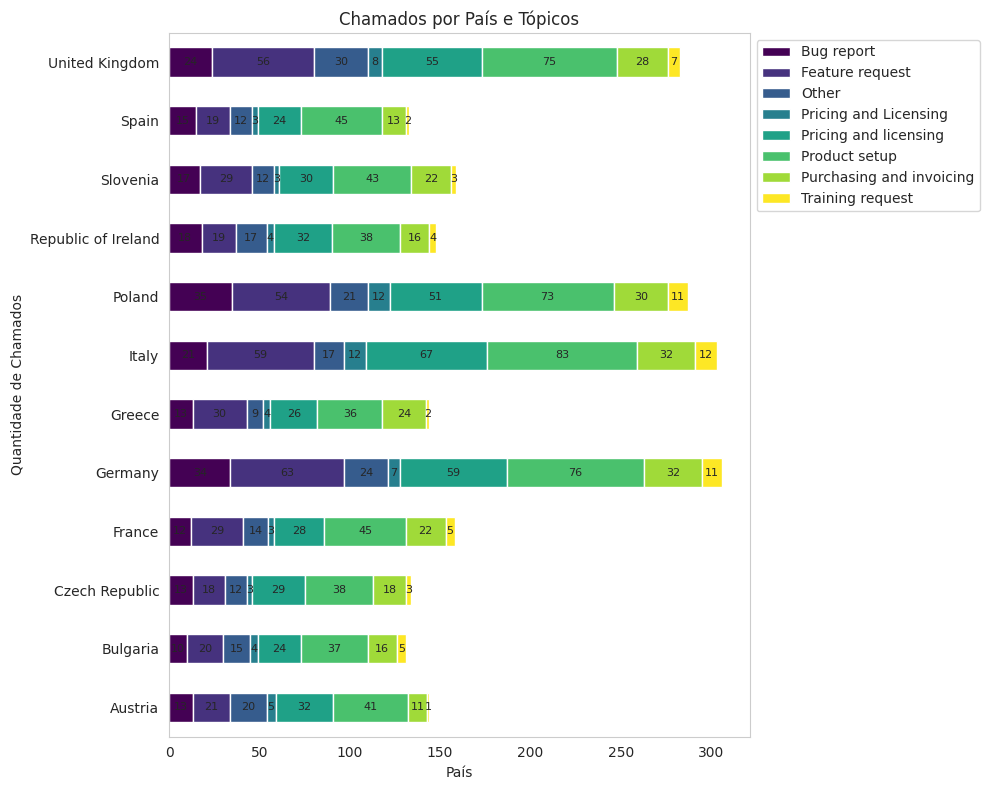

In [ ]:
# Chamados agrupados por País e Tópicos - gráfico de barras empilhadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


dados = chamados_tec.groupby(by=['Country','Topic']).size().unstack()



# Resetando o índice para tornar 'Country' uma coluna novamente
dados = dados.reset_index()

ax = dados.plot(x='Country',kind='barh', stacked=True,
        title='Chamados por País e Tópicos',figsize=(10, 8),colormap='viridis')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(False)

ax.set_xlabel('País')
ax.set_ylabel('Quantidade de Chamados')
for container in ax.containers: # imprime as quantidades de chamado por status, próximo às barras
    ax.bar_label(container, fontsize=8, label_type='center')

plt.tight_layout()
plt.show()


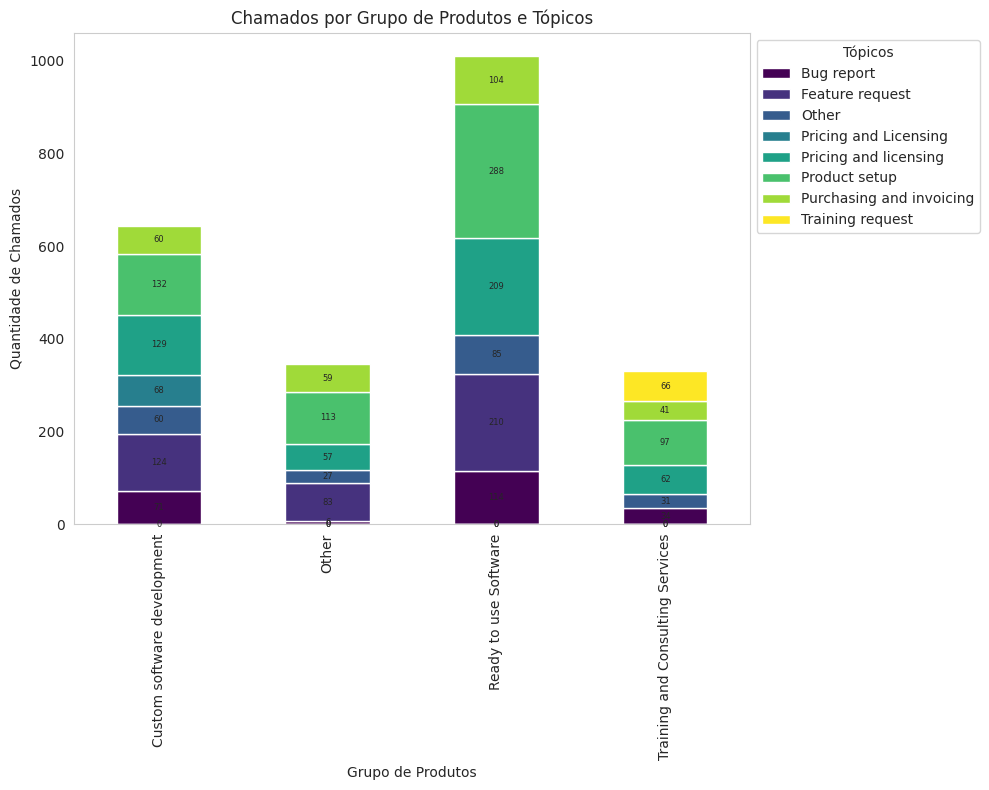

In [ ]:
# Chamados agrupados por Grupo de Produtos e Tópicos - gráfico de barras empilhadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


dados = chamados_tec.groupby(by=['Product group','Topic']).size().unstack()



# Resetando o índice da base de dados para tornar 'Product Group' uma coluna novamente
dados = dados.reset_index()

ax = dados.plot(x='Product group',kind='bar', stacked=True,
        title='Chamados por Grupo de Produtos e Tópicos',figsize=(10,8),colormap='viridis')
ax.legend(title='Tópicos',loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(False)

ax.set_xlabel('Grupo de Produtos')
ax.set_ylabel('Quantidade de Chamados')
for container in ax.containers: # imprime as quantidades de chamado por status, próximo às barras
    ax.bar_label(container, fontsize=6, label_type='center')

plt.tight_layout()
plt.show()


###Histograma - distribuição de notas (Survey results) dos chamados encerrrados

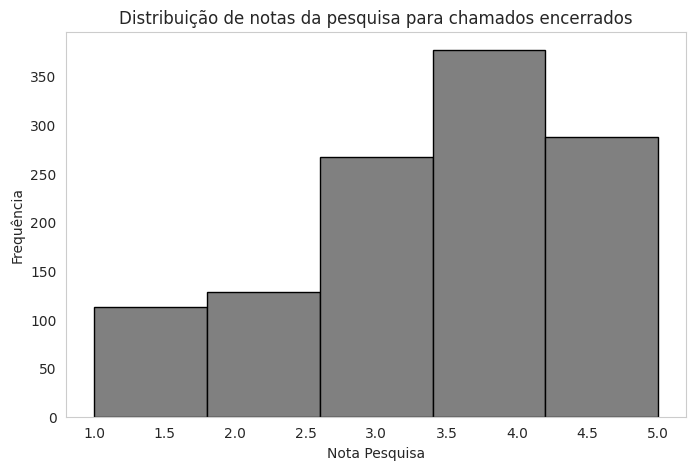

In [ ]:


import matplotlib.pyplot as plt

# histograma
plt.figure(figsize=(8, 5))
plt.grid(False)

# Filter the DataFrame to include only closed tickets
closed_tickets = chamados_tec[chamados_tec['Status'] == 'Closed']

plt.hist(closed_tickets['Survey results'], bins=5, edgecolor='black', color='grey')
plt.xlabel('Nota da Pesquisa')
plt.ylabel('Frequência')
plt.title('Distribuição de notas da pesquisa para chamados encerrados')




# incluindo título do gráfico e legenda
plt.title('Distribuição de notas da pesquisa para chamados encerrados')
plt.ylabel('Frequência')
plt.xlabel('Nota Pesquisa')
plt.show()






###Bloxplot - limites inferior e superior, quartis e valores extremos ("outliers")

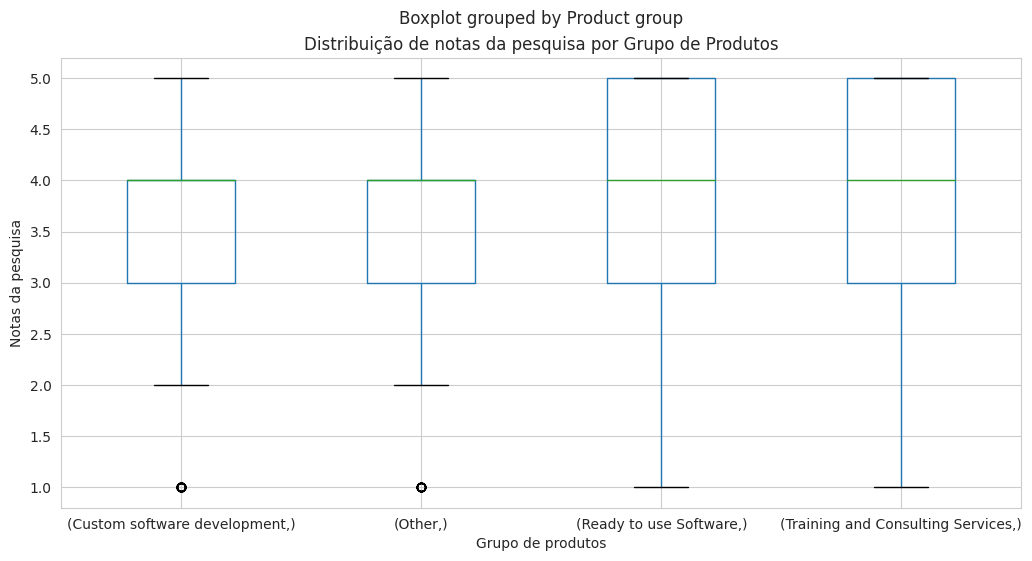

In [ ]:
import matplotlib.pyplot as plt
ax = chamados_tec.boxplot(column=['Survey results'], by=['Product group'], figsize=(12,6))
ax.set(xlabel='Grupo de produtos', ylabel='Notas da pesquisa')
plt.title('Distribuição de notas da pesquisa por Grupo de Produtos')
plt.show()

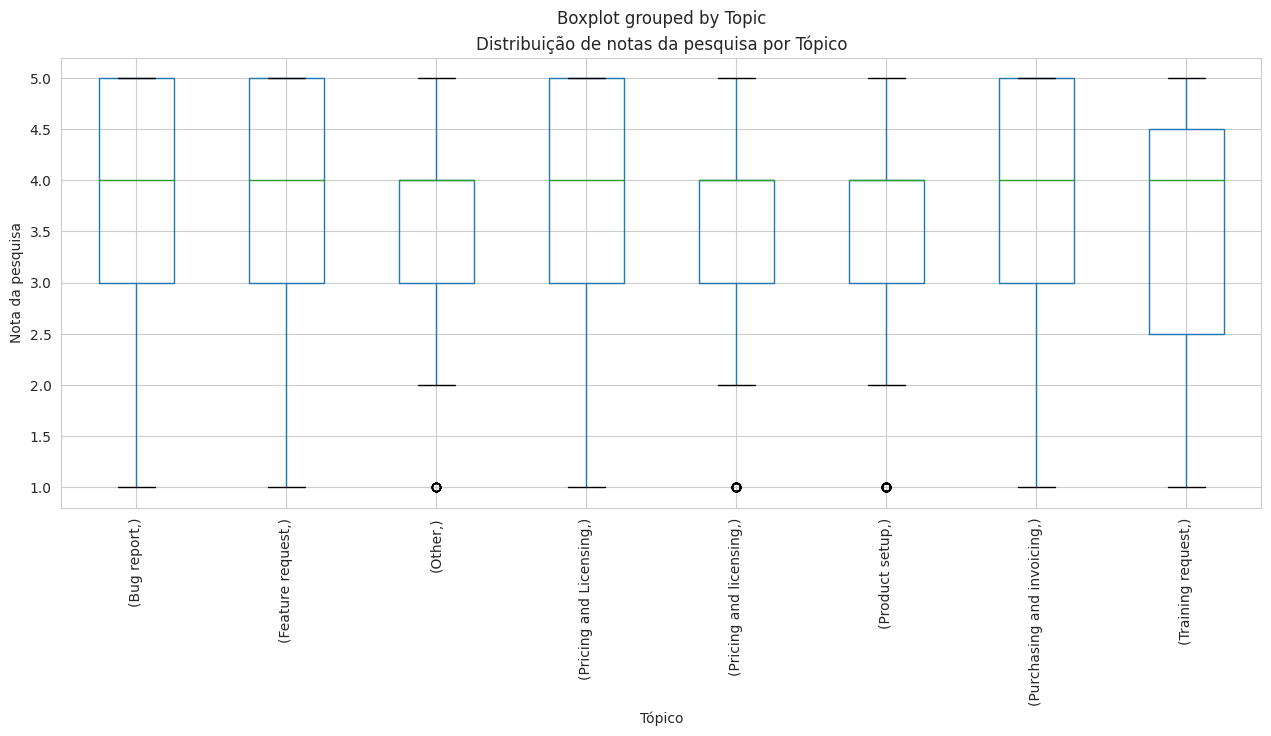

In [ ]:
import matplotlib.pyplot as plt
ax = chamados_tec.boxplot(column=['Survey results'], by=['Topic'], figsize=(15, 6))
plt.xticks(rotation=90)
ax.set(xlabel='Tópico', ylabel='Nota da pesquisa')
plt.title('Distribuição de notas da pesquisa por Tópico')
plt.show()

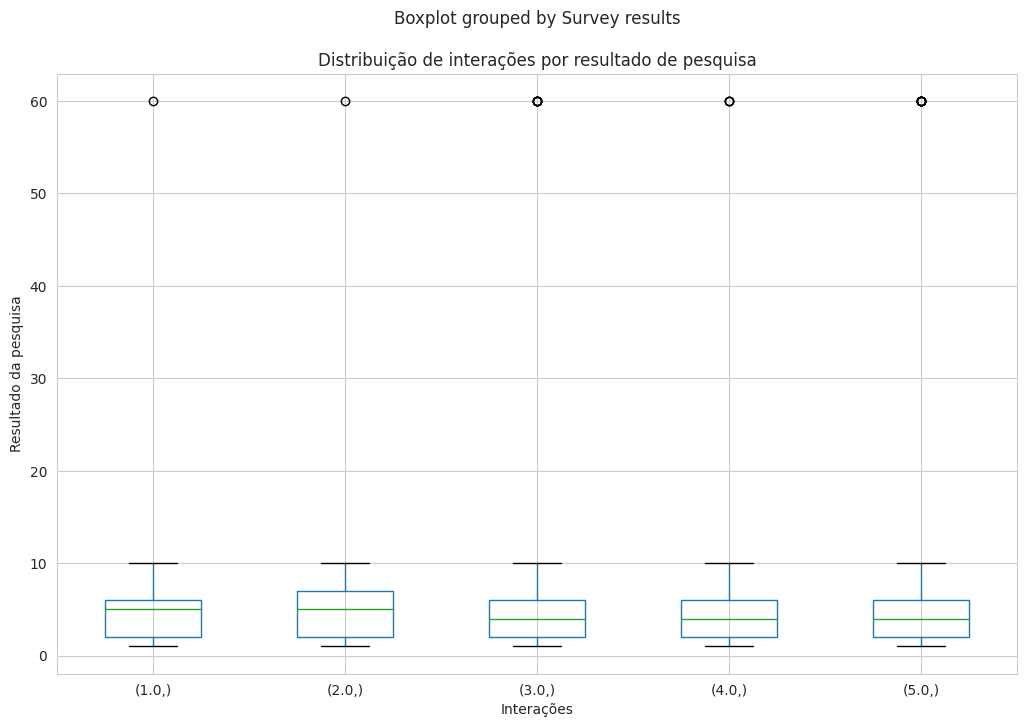

In [ ]:
import matplotlib.pyplot as plt
ax = chamados_tec.boxplot(column=['Agent interactions'], by=['Survey results'], figsize=(12, 8))
ax.set(xlabel='Interações', ylabel='Resultado da pesquisa')
plt.title('Distribuição de interações por resultado de pesquisa')
plt.show()

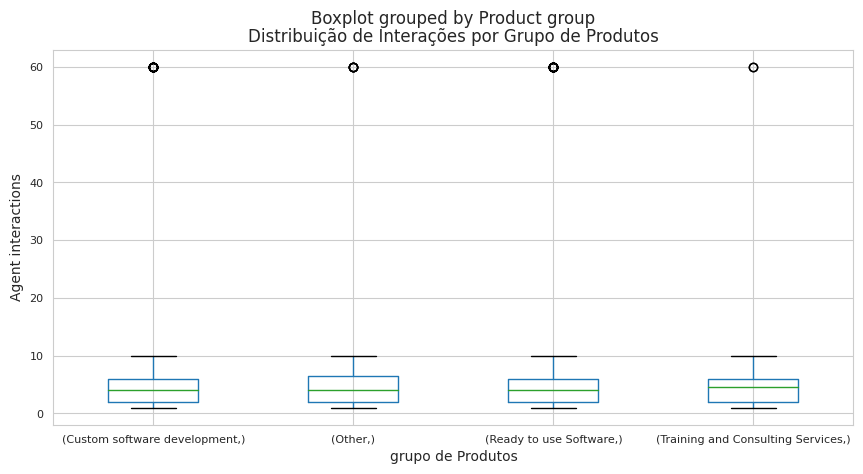

In [ ]:
import matplotlib.pyplot as plt
ax = chamados_tec.boxplot(column=['Agent interactions'], by=['Product group'], figsize=(10,5),fontsize=8)

ax.set(xlabel='grupo de Produtos', ylabel='Agent interactions')
plt.title('Distribuição de Interações por Grupo de Produtos')
plt.show()

###Gráfico de pizza - percentual por Status

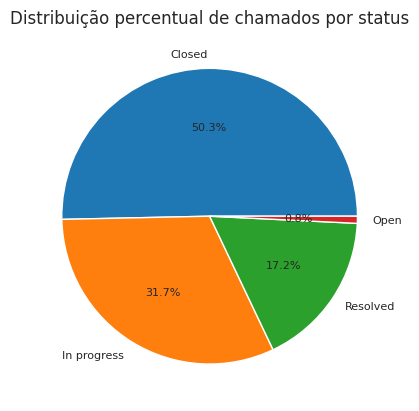

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de pizzas com o percentual por Status
# Calcula o número de valores únicos na coluna 'Status'
num_status = len(chamados_tec['Status'].value_counts())


plt.pie(chamados_tec['Status'].value_counts(), labels=chamados_tec['Status'].unique(), autopct='%1.1f%%')
plt.setp(plt.gcf().gca().texts,fontsize=8)

plt.title('Distribuição percentual de chamados por status')
plt.show()


##Distribuição dos tempos gastos para resolução de chamados (em minutos)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Created time - data de abertura do chamado
# Resolution time - data de resolução do chamado
# Converte 'Created time' para o formato datetime.
# Distribuição dos tempos gastos para resolução de chamados (em minutos)
# Elapsed time - tempo gasto para a resolução de chamados
# Elapsed time ==>  (data de resolução - tempo de abertura).
# Elapsed time está expresso em minutos

def calcular_tempo_gasto_chamado(chamados_tec):
  chamados_tec['Created time'] = pd.to_datetime(chamados_tec['Created time'])
  chamados_tec['Resolution time'] = pd.to_datetime(chamados_tec['Resolution time'])
  chamados_tec['Elapsed time']  = chamados_tec['Resolution time'] - chamados_tec['Created time']
  Elapsed_time_numeric_minutos = chamados_tec['Elapsed time'].dt.total_seconds()/60
  chamados_tec['Elapsed time'] = Elapsed_time_numeric_minutos
  return(chamados_tec['Elapsed time'])

tempo_gasto = calcular_tempo_gasto_chamado(chamados_tec)
texto = 'Distribuição dos tempos para resolução de um chamado (em minutos)'
print(texto,end='\n')
print('='*len(texto),end='\n\n')
print(tempo_gasto.describe())


Distribuição dos tempos para resolução de um chamado (em minutos)

count    1912.000000
mean     1994.277457
std      1994.169234
min         1.175050
25%       648.848700
50%      1313.226567
75%      2467.461942
max      8810.799683
Name: Elapsed time, dtype: float64


##Gráfico de horários de pico para abertura de chamados

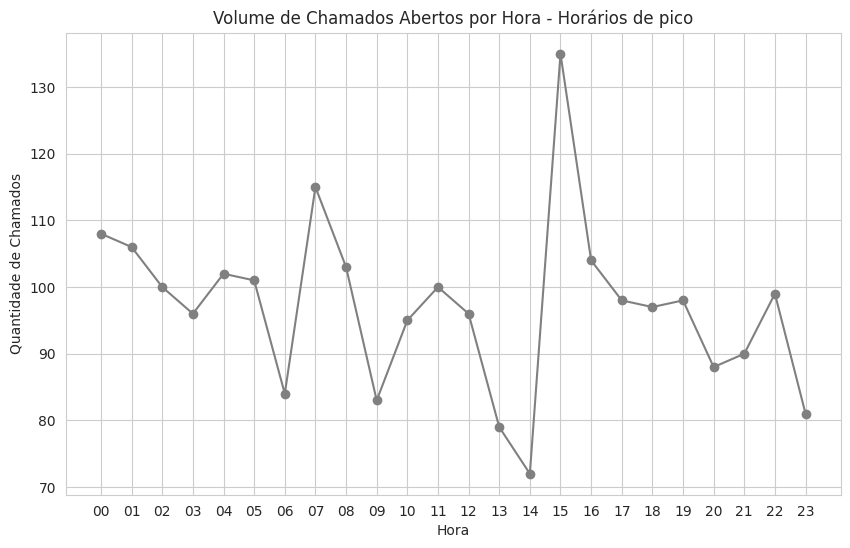

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Declaração da variável cont_horas
# cont_horas - data de criação do chamado agrupada por horas

chamados_tec['Hour'] = chamados_tec['Created time'].dt.strftime('%H')
cont_horas = chamados_tec.groupby('Hour').size()


# Gráfico de linhas - horários de pico

import matplotlib.pyplot as plt
import seaborn as sns
dados = cont_horas.values
horas = cont_horas.index.astype(str)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(horas, dados, marker='o', color='grey')
#plt.xticks(rotation=90)
plt.title('Volume de Chamados Abertos por Hora - Horários de pico')
plt.xlabel('Hora')
plt.ylabel('Quantidade de Chamados')
plt.show()

## Mapa de calor

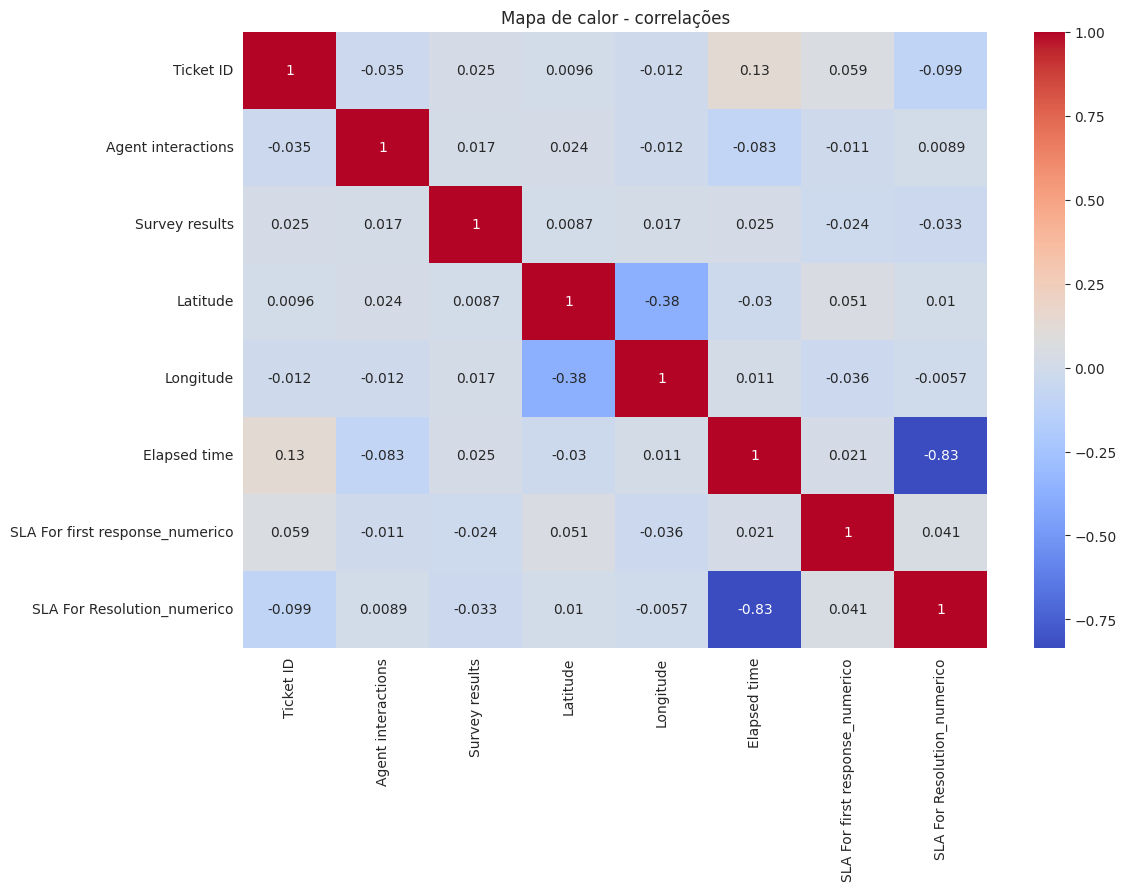

In [ ]:
# Converte as strings para booleano para os atributos SLA For first response e SLA For Resolution
# SLA for first response - data / hora acordada para iniciar o tratamento do chamado
# SLA for resolution - data / hora acordada para finalizar o tratamento do chamado
# Valores: 'Within Sla' == True  e 'Sla violated' == False
# 0 - False - não atendeu o SLA
# 1 - True - dentro do SLA

chamados_tec['SLA For first response_numerico'] = (pd.get_dummies(chamados_tec['SLA For first response'], drop_first=True))
chamados_tec['SLA For Resolution_numerico'] = (pd.get_dummies(chamados_tec['SLA For Resolution'], drop_first=True))


#Conversão de booleano para numérico
chamados_tec['SLA For first response_numerico'] = chamados_tec['SLA For first response_numerico'].astype(int)
chamados_tec['SLA For Resolution_numerico'] = chamados_tec['SLA For Resolution_numerico'].astype(int)


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#mapa calor

# O mapa de calor só pode ter campos numéricos (include=[np.number])
campos_numericos_cham_tec = chamados_tec.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(campos_numericos_cham_tec.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor - correlações')
plt.show()


O atributo **SLA For Resolution_numerico** foi criado para tranformar os valores "Within SLA" e "SLA Violated" em valores numéricos.
  *   1 - True  - "Within SLA" - cumpriu o SLA
  *   0 - False - "SLA Violated" - não cumpriu o SLA

O atributo **Elapsed** Time foi criado para calcular o tempo gasto em minutos para resolver o chamado (data/hora resolução - data /hora criação).

A criação deste atributo e do atributo Elapsed Time permitiu ter um mapa de calor com mais variáveis numéricas, pois os atributos (colunas do dataset) possuem pouquíssima correlação linear entre si (exceto latitude e longitude).

Os atributos (features) **SLA For Resolution_numerico** e Elapsed Time possuem forte correlação linear negativa. Isto significa que:
  *   Se o SLA não é cumprido (SLA For Resolution_numerico == 0), o tempo para resolução é alto;
  *   Se o SLA não é cumprido (SLA For Resolution_numerico == 0), o tempo para resolução é baixo.


##Chamados por país e cumprimento(ou não) de SLA

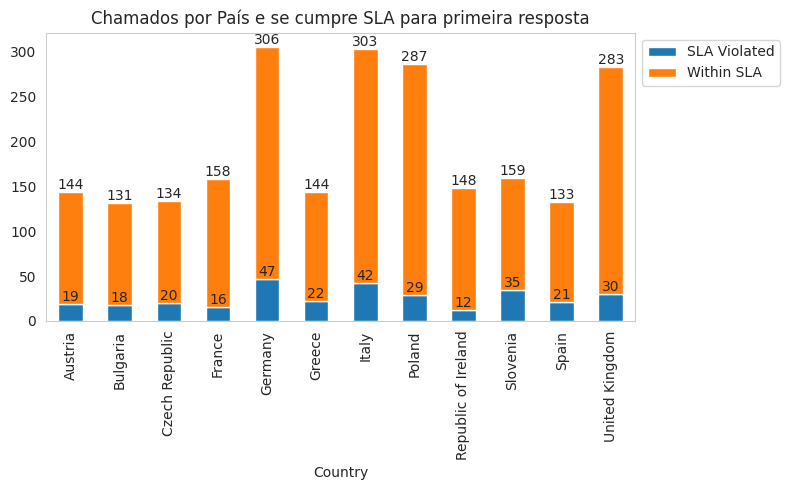

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
dados = chamados_tec.groupby(by=['Country','SLA For first response']).size().unstack()
# O Gráfico abaixo mostra se um país cumpre o SLA (Acordo de Nível de Serviço para primeira resposta)
# Exibe o total geral de chamados por país e os chamados que violaram o SLA (em azul)
ax = dados.plot.bar(figsize=(8,5),stacked=True)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

for container in ax.containers: # imprime as quantidades de chamado por origem, próximo às barras
    ax.bar_label(container)


ax.grid(False)
ax.set_title('Chamados por País e se cumpre SLA para primeira resposta')
plt.tight_layout()
plt.show()

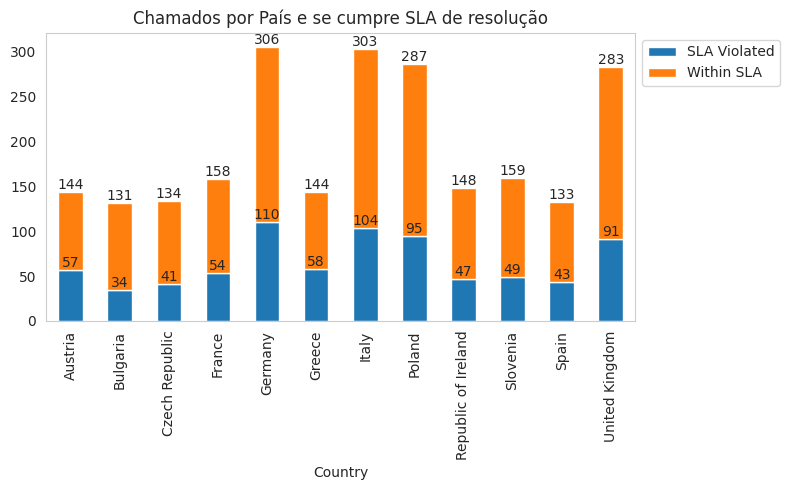

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
dados = chamados_tec.groupby(by=['Country','SLA For Resolution']).size().unstack()

# O Gráfico abaixo mostra se um país cumpre o SLA (Acordo de Nível de Serviço para resolver o chamado)
# Exibe o total geral de chamados por país e os chamados que violaram o SLA (em azul)
ax = dados.plot.bar(figsize=(8,5),stacked=True)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

for container in ax.containers: # imprime as quantidades de chamado por SLA de resolução, próximo às barras
    ax.bar_label(container)



ax.grid(False)
ax.set_title('Chamados por País e se cumpre SLA de resolução')
plt.tight_layout()
plt.show()

##Acurácia do Modelo de Dados

In [ ]:
# Acurácia do modelo de dados
from sklearn.metrics import accuracy_score
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


def calcular_acuracia_sla_modelo(chamados_tec):
  # carga do dataset através da url, com separador de colunas = "," e pulando linhas com erros
  chamados_tec = pd.read_csv(url_dados, sep =",", on_bad_lines='skip') # pulando linhas com erros


  # Preparar os dados para previsão
  chamados_tec['Status'] = chamados_tec['Status'].astype('category').cat.codes
  atributos = ['Priority', 'Source', 'Agent Group', 'Product group', 'Support Level', 'Country']
  chamados_tec = pd.get_dummies(chamados_tec, columns=atributos, drop_first=True)
  X = chamados_tec.drop(['Status', 'Ticket ID', 'Agent Name', 'Created time', 'Expected SLA to resolve', 'Expected SLA to first response', 'First response time', 'Resolution time', 'Close time'], axis=1)
  y = chamados_tec['Status']

  # Assegurar que todas as colunas são numéricas
  X = X.apply(pd.to_numeric, errors='coerce')
  X = X.fillna(0)

  # Dividir os dados em ddados de treino e de teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Treinar um Random Forest Classifier - floresta aleatória - árvore de decisão
  clf = RandomForestClassifier(n_estimators=100, random_state=42)
  clf.fit(X_train, y_train)

  # Prever e calcular acurácia do modelo de dados
  y_pred = clf.predict(X_test)
  acuracia = accuracy_score(y_test, y_pred)
  return(acuracia)



acuracia_modelo_dados = calcular_acuracia_sla_modelo(chamados_tec)
print(f"Acurácia do modelo de dados: {acuracia_modelo_dados:.4%}")




Acurácia do modelo de dados: 79.3991%


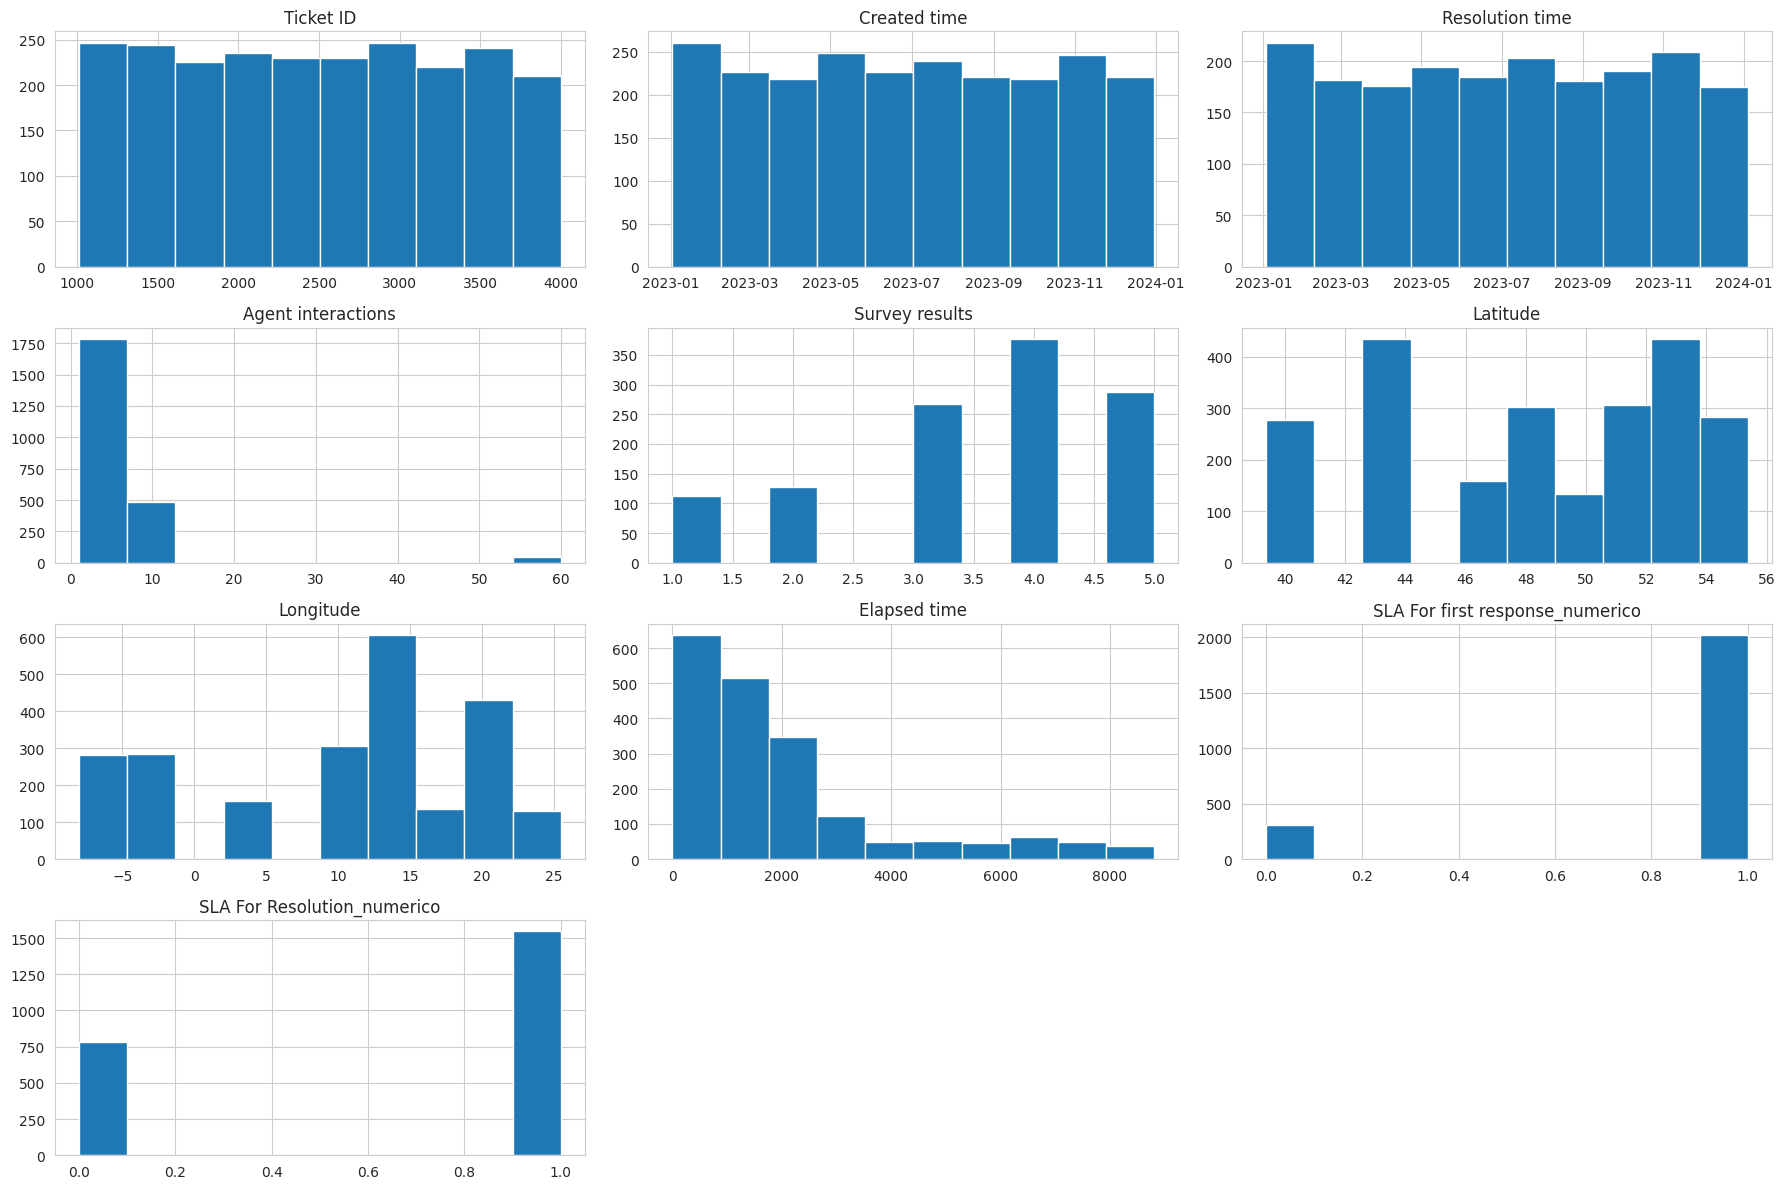

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma
chamados_tec.hist(figsize = (18,12))
plt.xticks(fontsize=4, rotation=45)
plt.yticks(fontsize=6)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()







##Instalação do Pandas Profiling para gerar relatórios sobre o modelo

Instalação do Pandas Profiling para gerar relatórios que fornecem uma visão geral do dataset, as interações entre variáveis, as correlações, os valores faltantes, uma amostra (primeiros e últimos elementos).

In [ ]:
# Instalando  pandas profiling (executar apenas na 1a vez, depois comentar esta linha)
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

# imports necessários
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport #import para geração de relatórios

# geração do report
profile = ProfileReport(chamados_tec, title='Pandas Profiling Report', html={'style':{'full_width':False}})
profile.to_notebook_iframe()


     / 17.8 MB 35.8 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 45.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356222 sha256=18d387663708c2d9a58b4c6feee136d4d49670da7d54bb296262ecadb8772122
  Stored in directory: /tmp/pip-ephem-wheel-cache-5a6nl_k5/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6fa8271dc27d09e36c7c8ef6637b6291747d7ff32abfa50f27aa4f1b5a4bae63
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succe

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]